In [2]:
%pip install -U langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph # framework for building state graphs
import operator

In [37]:
# create an agent state - shared data structure that keeps track of information as your app runs 
class AgentState(TypedDict):
    name: str
    message: Annotated[str, operator.add]

def greeting_node(state):
    return {"message": f'Hey {state["name"]}, how is your day going?'}

In [38]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)

graph.set_entry_point("greeting")
graph.set_finish_point("greeting")

app = graph.compile()

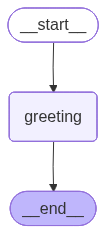

In [39]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
result = app.invoke({"name": "Hassan", "message": ""})

In [41]:
print(result["message"])

Hey Hassan, how is your day going?
